In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
wisconsin_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
wisconsin_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(wisconsin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
missing_values = wisconsin_df.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# drop unwanted columns
wisconsin_df.drop(columns=['Unnamed: 32', 'id'], inplace=True)
wisconsin_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# encoding
le = LabelEncoder()
wisconsin_df['diagnosis'] = le.fit_transform(wisconsin_df['diagnosis'])

In [8]:
# Split the dataset into features and labels
wisconsin_X = wisconsin_df.drop(columns=['diagnosis'])
wisconsin_y = wisconsin_df['diagnosis']

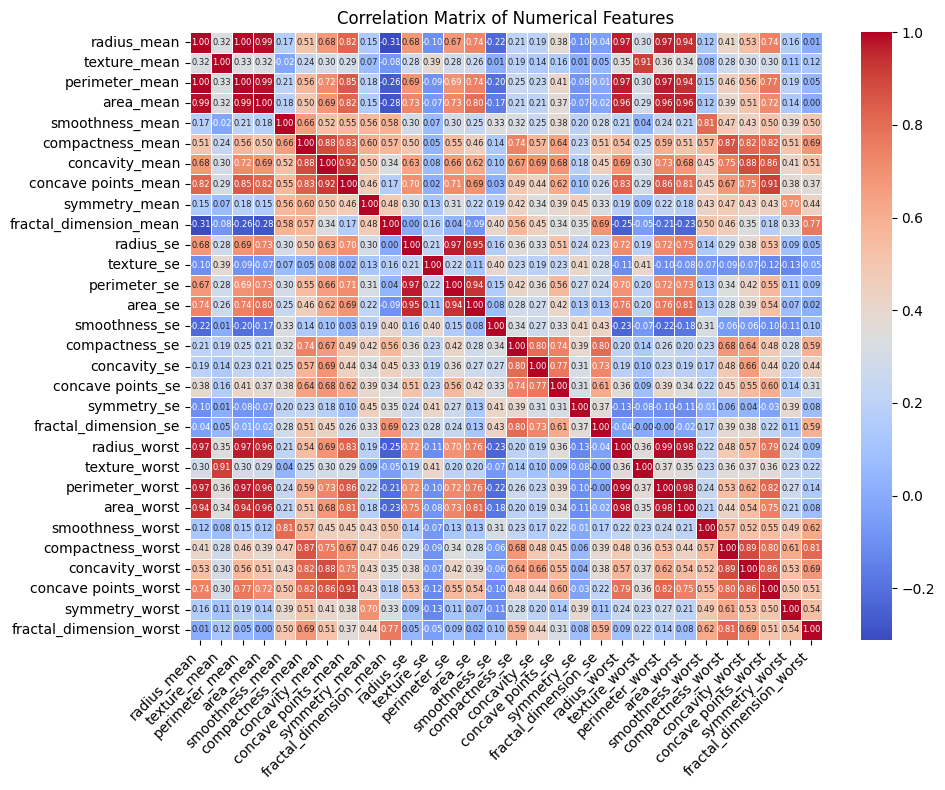

Features dropped due to high correlation (>|0.9|):
['area_mean', 'area_se', 'area_worst', 'concave points_mean', 'concave points_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_worst', 'texture_worst']


In [9]:
# Dropping Collinear Features. Dropped features with collinearity > 0.9
corr_matrix = wisconsin_X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 6})
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

high_corr_features = set()
threshold = 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            high_corr_features.add(corr_matrix.columns[i])

print(f"Features dropped due to high correlation (>|{threshold}|):")
print(sorted(high_corr_features))

wisconsin_X = wisconsin_X.drop(columns=high_corr_features)

In [10]:
# Data distribution
print("Data distribution:", wisconsin_y.value_counts(normalize=True))

Data distribution: diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [11]:
# Split the dataset into training (70%), validation (15%), and test (15%) sets
wisconsin_X_dev, wisconsin_X_test, wisconsin_y_dev, wisconsin_y_test = train_test_split(
    wisconsin_X, wisconsin_y, test_size=0.15, random_state=42, stratify=wisconsin_y)
wisconsin_X_train, wisconsin_X_val, wisconsin_y_train, wisconsin_y_val = train_test_split(
    wisconsin_X_dev, wisconsin_y_dev, test_size=0.1765, random_state=42, stratify=wisconsin_y_dev)

print(f"Training set dimensions: {wisconsin_X_train.shape}, {wisconsin_y_train.shape}")
print(f"Validation set dimensions: {wisconsin_X_val.shape}, {wisconsin_y_val.shape}")
print(f"Test set dimensions: {wisconsin_X_test.shape}, {wisconsin_y_test.shape}")

Training set dimensions: (397, 20), (397,)
Validation set dimensions: (86, 20), (86,)
Test set dimensions: (86, 20), (86,)


In [12]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
wisconsin_X_train_smote, wisconsin_y_train_smote = smote.fit_resample(wisconsin_X_train, wisconsin_y_train)

print("Training set shape before SMOTE:", wisconsin_X_train.shape, wisconsin_y_train.shape)
print("Training set shape after SMOTE:", wisconsin_X_train_smote.shape, wisconsin_y_train_smote.shape)

Training set shape before SMOTE: (397, 20) (397,)
Training set shape after SMOTE: (498, 20) (498,)


In [13]:
# Standardize the columns in the feature matrices
ss = StandardScaler()
wisconsin_X_train_smote = ss.fit_transform(wisconsin_X_train_smote)
wisconsin_X_val = ss.transform(wisconsin_X_val)
wisconsin_X_test = ss.transform(wisconsin_X_test)

Logitsic Regression

In [14]:
# Hyperparameter Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
clf = LogisticRegression(solver='liblinear', random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

print("Best params:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

Best params: {'C': 0.1}
Best F1 score: 0.9631338899196041


In [15]:
clf = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
clf.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

y_pred_test = clf.predict(wisconsin_X_test)

print("Test Accuracy:", accuracy_score(wisconsin_y_test, y_pred_test))
print("Classification Report:\n", classification_report(wisconsin_y_test, y_pred_test))

Test Accuracy: 0.9883720930232558
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



In [16]:
y_proba_test = clf.predict_proba(wisconsin_X_test)[:, 1]
print("Test ROC-AUC:", roc_auc_score(wisconsin_y_test, y_proba_test))

Test ROC-AUC: 0.9988425925925927


Support Vector Machines (SVM)

In [17]:
# Hyperparameter Tuning

from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_clf = SVC(probability=True, random_state=42)
grid = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1')
grid.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

print("Best params:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 score: 0.96709141169745


In [18]:
svm = grid.best_estimator_
svm.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

y_pred_val = svm.predict(wisconsin_X_val)
y_pred_test = svm.predict(wisconsin_X_test)

print("Test Accuracy:", accuracy_score(wisconsin_y_test, y_pred_test))
print("Classification Report:\n", classification_report(wisconsin_y_test, y_pred_test))

Test Accuracy: 0.9767441860465116
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [19]:
y_proba_test = svm.predict_proba(wisconsin_X_test)[:, 1]
print("Test ROC-AUC:", roc_auc_score(wisconsin_y_test, y_proba_test))

Test ROC-AUC: 0.9797453703703703


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

rf_best = rf_grid.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

xgb_best = xgb_grid.best_estimator_
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [22]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    val_f1 = f1_score(y_val, y_val_pred)
    val_roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Validation F1 Score: {val_f1:.4f}, Validation AUC-ROC: {val_roc_auc:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}, Test AUC-ROC: {test_roc_auc:.4f}")
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

print("Random Forest Evaluation:")
evaluate_model(rf_best, wisconsin_X_val, wisconsin_y_val, wisconsin_X_test, wisconsin_y_test)

print("\nXGBoost Evaluation:")
evaluate_model(xgb_best, wisconsin_X_val, wisconsin_y_val, wisconsin_X_test, wisconsin_y_test)

Random Forest Evaluation:
Validation F1 Score: 0.9524, Validation AUC-ROC: 0.9983
Test F1 Score: 0.9688, Test AUC-ROC: 0.9983

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.97      0.97      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86


XGBoost Evaluation:
Validation F1 Score: 0.9524, Validation AUC-ROC: 0.9971
Test F1 Score: 0.9677, Test AUC-ROC: 0.9977

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



Ensemble Learning with Logistic Regression and Support Vector Machines

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# assume `clf` and `svm` are already trained with probability=True for SVM
# otherwise you need to re-fit SVM with probability=True

# 1) Create a VotingClassifier
ensemble = VotingClassifier(
    estimators=[('lr', clf), ('svm', svm)],
    voting='soft'               # use soft voting to average predicted probabilities
)

# 2) Fit the ensemble on your SMOTE‐oversampled training data
ensemble.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

# 3) Evaluate on test set
y_pred = ensemble.predict(wisconsin_X_test)
y_proba = ensemble.predict_proba(wisconsin_X_test)[:, 1]

print("Ensemble Test Accuracy:", accuracy_score(wisconsin_y_test, y_pred))
print("Ensemble Classification Report:\n", classification_report(wisconsin_y_test, y_pred))
print("Ensemble Test ROC‑AUC:", roc_auc_score(wisconsin_y_test, y_proba))

Ensemble Test Accuracy: 0.9767441860465116
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86

Ensemble Test ROC‑AUC: 0.998263888888889


Ensemble with all the models

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# 2) Create the VotingClassifier with all four estimators
ensemble = VotingClassifier(
    estimators=[
        ('lr', clf),
        ('svm', svm),
        ('rf', rf_best),
        ('xgb', xgb_best)
    ],
    voting='soft',        # average predicted probabilities
    n_jobs=-1             # parallelize predictions
)

# 3) Fit on your SMOTE‐oversampled training set
ensemble.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

# 4) Evaluate on test set
y_pred = ensemble.predict(wisconsin_X_test)
y_proba = ensemble.predict_proba(wisconsin_X_test)[:, 1]

print("Ensemble Test Accuracy : ", accuracy_score(wisconsin_y_test, y_pred))
print("Ensemble Test F1 Score  : ", f1_score(wisconsin_y_test, y_pred))
print("Ensemble Test ROC‑AUC   : ", roc_auc_score(wisconsin_y_test, y_proba))
print("\nEnsemble Classification Report:\n", classification_report(wisconsin_y_test, y_pred))


Ensemble Test Accuracy :  0.9883720930232558
Ensemble Test F1 Score  :  0.9841269841269841
Ensemble Test ROC‑AUC   :  0.9994212962962963

Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



Weighted Soft-Voting Ensemble with all models

In [25]:
# Choosing weights proportional to val-ROC:
#   LR:0.9983, RF:0.9983, XGB:0.9971, SVM:0.9983 → normalize
weights = [0.9983, 0.9983, 0.9983, 0.9971]
total = sum(weights)
weights = [w/total for w in weights]

ensemble_wt = VotingClassifier(
    estimators=[('lr', clf),
                ('svm', svm),
                ('rf', rf_best),
                ('xgb', xgb_best)],
    voting='soft',
    weights=weights,
    n_jobs=-1
)
ensemble_wt.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, random_state=42,
                                                 solver='liblinear')),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_byt...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 n_jobs=-1, voting='soft',
                 weights=[0.2500751503006012, 0.2500751503006012,
                          0.2500751503006012, 0.24977454909819638])

In [26]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Predict on test set
y_pred_wt  = ensemble_wt.predict(wisconsin_X_test)
y_proba_wt = ensemble_wt.predict_proba(wisconsin_X_test)[:, 1]

# Compute metrics
acc   = accuracy_score(wisconsin_y_test, y_pred_wt)
f1    = f1_score(wisconsin_y_test, y_pred_wt)
auc   = roc_auc_score(wisconsin_y_test, y_proba_wt)
report = classification_report(wisconsin_y_test, y_pred_wt)

# Print
print(f"Weighted Ensemble Test Accuracy : {acc:.4f}")
print(f"Weighted Ensemble Test F1 Score  : {f1:.4f}")
print(f"Weighted Ensemble Test ROC‑AUC   : {auc:.4f}\n")
print("Classification Report:\n", report)

Weighted Ensemble Test Accuracy : 0.9884
Weighted Ensemble Test F1 Score  : 0.9841
Weighted Ensemble Test ROC‑AUC   : 0.9994

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



Stacking Ensemble

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=[
        ('lr', clf),
        ('svm', svm),
        ('rf', rf_best),
        ('xgb', xgb_best)
    ],
    final_estimator=LogisticRegression(),  # your meta-model
    cv=5,                                   # generate OOF preds
    n_jobs=-1
)

stack.fit(wisconsin_X_train_smote, wisconsin_y_train_smote)

# Evaluate:
y_pred = stack.predict(wisconsin_X_test)
y_proba = stack.predict_proba(wisconsin_X_test)[:,1]

# Metrics
acc = accuracy_score(wisconsin_y_test, y_pred)
f1  = f1_score(wisconsin_y_test, y_pred)
auc = roc_auc_score(wisconsin_y_test, y_proba)

print(f"Stacking Test Accuracy : {acc:.4f}")
print(f"Stacking Test F1 Score  : {f1:.4f}")
print(f"Stacking Test AUC       : {auc:.4f}")

Stacking Test Accuracy : 0.9884
Stacking Test F1 Score  : 0.9841
Stacking Test AUC       : 0.9994
